In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
base_path = '/content/gdrive/MyDrive/ServiceScienceDati'   # /content/gdrive/Shareddrives
#base_path ='/content/gdrive/MyDrive/Service Science - PROGETTO/dati'

In [6]:
df = pd.read_csv(f"{base_path}/attiv_stor_milano.csv", encoding="utf-8")
df

,ID_NLS,TIPO,RIC,PR,COMUNE,INDIR_ORIG,ZIP,ISTAT,DENOM_IMPRES,INSEGNA,INIZIO_ATT,ANNO_RICONOSCIMENTO,CAT_MERC,geo_y,geo_x
0,1766794,Negozio storico,Storica attività,MI,MILANO,VIA MICHELINO DA BESOZZO 10,20155,15146,PALADINI ABBIGLIAMENTO SAS DI PALADINI STEFANO...,PALADINI,1965,2020,Abbigliamento e accessori,45.493878,9.150329
1,2298345,Negozio storico,Storica attività,MI,MILANO,JENNER 0060,20159,15146,RADIO JENNER S.A.S. DI SERGIO PALADINI & C.,COECO,1956,2020,Attrezzature,45.496910,9.173791
2,2298859,Locale storico,Storica attività,MI,MILANO,MURATORI LODOVICO 11,20135,15146,BONATTI WALTER,BARBISA,1973,2020,Bar e tabaccheria,45.452054,9.205126
3,2298872,Locale storico,Storica attività,MI,MILANO,CHAVEZ GIORGIO 4,20131,15146,NEW STEP S.R.L.,PIZZERIA VECCHIA NAPOLI,1968,2020,Ristorazione,45.492083,9.226585
4,2319623,Bottega artigiana storica,Bottega storica,MI,MILANO,PADOVA 186,20132,15146,ACCONCIATURE UNISEX S.A.S. DI ANDREA ROSSI & C.,ACCONCIATURE UNISEX ANDREA ROSSI,1965,2020,Cura della persona,45.501285,9.237044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,6357,Negozio storico,Storica attività,MI,MILANO,VIA G. MORONE 2,20121,15146,Galleria Bolzani S.r.l.,GALLERIA BOLZANI,1922,2010,Casa e arredamento,45.467906,9.192201
439,7439,Negozio storico,Storica attività,MI,MILANO,"VIA CREMA, 25",20135,15146,PASTICCERIA SOMMARIVA S.A.S. DI SOMMARIVA IVAN...,PASTICCERIA SOMMARIVA,1919,2015,Alimentari e specialità alimentari,45.448111,9.203053
440,7900,Locale storico,Storica attività,MI,MILANO,"VIA ALFONSO LAMARMORA, 31",20122,15146,PASTICCERIA ANGELO POLENGHI S.R.L.,PASTICCERIA GELATERIA POLENGHI,1937,2018,"Gelaterie, pasticcerie e torrefazioni",45.457416,9.203753
441,8423,Negozio storico,Negozio storico,MI,MILANO,"CORSO GIUSEPPE GARIBALDI, 71",20121,15146,ROSSIGNOLI S.R.L.,ROSSIGNOLI,1945,2020,Sport e tempo libero,45.475043,9.183433


In [7]:
df_preguerra = df[df["INIZIO_ATT"]>1900].sort_values(by = "INIZIO_ATT")
df_preguerra = df_preguerra[df_preguerra["INIZIO_ATT"]<1940]
df_preguerra

,ID_NLS,TIPO,RIC,PR,COMUNE,INDIR_ORIG,ZIP,ISTAT,DENOM_IMPRES,INSEGNA,INIZIO_ATT,ANNO_RICONOSCIMENTO,CAT_MERC,geo_y,geo_x
223,6762,Negozio storico,Storica attività,MI,MILANO,"CORSO BUENOS AIRES, 55",20124,15146,Farm. Marinoni della D.sa Marinoni & C. snc,FARMACIA DOTT. MARINONI,1901,2010,Salute e benessere,45.482172,9.212561
388,7975,Negozio storico,Storica attività,MI,MILANO,"VIA PONTACCIO, 12",20121,15146,ARNALDO CASTELLI DI CASTELLI CLEMENTINA,ARNALDO CASTELLI,1902,2018,Casa e arredamento,45.472686,9.186026
255,6977,Negozio storico,Storica attività,MI,MILANO,"VIA MONTEGANI LUDOVICO, 66",20141,15146,PANIFICIO ROBERTO DI GELMINI ROBERTO,ANTICO FORNO GELMINI,1903,2010,Alimentari e specialità alimentari,45.432125,9.177513
194,6431,Negozio storico,Storica attività,MI,MILANO,"Via Santa Sofia, 1",20122,15146,Boscani Nova sas,BOSCANI NOVA - TENDE IN LEGNO E TAPPETI,1904,2010,Casa e arredamento,45.457305,9.193012
65,6214,Negozio storico,Storica attività,MI,MILANO,"Via G.Morone, 3",20121,15146,Antica Barbieria Colla,ANTICA BARBIERIA COLLA,1904,2010,Cura della persona,45.468111,9.191847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,6367,Negozio storico,Storica attività,MI,MILANO,"Via Lazzaro Spallanzani, 18",20129,15146,Grancini Roberto Vini S.a.s.,GRANCINI VINI E LIQUORI,1938,2010,Alimentari e specialità alimentari,45.476046,9.207664
230,6771,Locale storico,Storica attività,MI,MILANO,"VIA GONZAGA, 6",20123,15146,Ristorante da Bruno sas,RISTORANTE DA BRUNO,1939,2010,Ristorazione,45.461511,9.188785
391,7991,Locale storico,Locale storico,MI,MILANO,"VIA BORGOSPESSO, 12",20121,15146,S.T.R.A. S.R.L.,RISTORANTE BICE,1939,2019,Ristorazione,45.470142,9.194192
47,3591337,Negozio storico,Negozio storico,MI,MILANO,LARGO CLAUDIO TREVES 0002,20121,15146,ARGENTERIA DABBENE S.R.L.,DABBENE,1939,2022,Preziosi,45.475218,9.187158


In [8]:
df_alimentari = df[df["CAT_MERC"] == "Alimentari e specialità alimentari"].sort_values(by = "INIZIO_ATT")
df_alimentari 

,ID_NLS,TIPO,RIC,PR,COMUNE,INDIR_ORIG,ZIP,ISTAT,DENOM_IMPRES,INSEGNA,INIZIO_ATT,ANNO_RICONOSCIMENTO,CAT_MERC,geo_y,geo_x
177,6409,Negozio storico,Negozio storico,MI,MILANO,"Via Spadari, 9",20123,15146,Peck S.p.a.,PECK,1883,2010,Alimentari e specialità alimentari,45.463541,9.186982
159,6383,Negozio storico,Storica attività,MI,MILANO,"via Santa Raedegonda, 16",20121,15146,Luini S.r.l.,PANZEROTTI LUINI,1888,2010,Alimentari e specialità alimentari,45.465815,9.191455
255,6977,Negozio storico,Storica attività,MI,MILANO,"VIA MONTEGANI LUDOVICO, 66",20141,15146,PANIFICIO ROBERTO DI GELMINI ROBERTO,ANTICO FORNO GELMINI,1903,2010,Alimentari e specialità alimentari,45.432125,9.177513
175,6407,Negozio storico,Storica attività,MI,MILANO,"Via Cappuccio, 22",20123,15146,Panificio Pasticceria Lia S.n.c. di Silini Lia...,PANIFICIO PASTICCERIA LIA,1907,2010,Alimentari e specialità alimentari,45.463863,9.179425
191,6427,Negozio storico,Storica attività,MI,MILANO,"Via Vigna, 5",20123,15146,Salumeria Lia S.n.c.,SALUMERIA LIA,1907,2010,Alimentari e specialità alimentari,45.463987,9.179564
363,7788,Negozio storico,Storica attività,MI,MILANO,"VIA NICASTRO, 4",20137,15146,GATTI GIANANTONIO,PANIFICIO GATTI,1909,2017,Alimentari e specialità alimentari,45.452060,9.221686
274,7204,Negozio storico,Storica attività,MI,MILANO,"PIAZZALE CANTORE ANTONIO, 5",20123,15146,PANIFICIO ROMAGNOLI F. & C. S.A.S.,PASTICCERIA PANIFICIO TROIAN,1913,2012,Alimentari e specialità alimentari,45.455439,9.174488
439,7439,Negozio storico,Storica attività,MI,MILANO,"VIA CREMA, 25",20135,15146,PASTICCERIA SOMMARIVA S.A.S. DI SOMMARIVA IVAN...,PASTICCERIA SOMMARIVA,1919,2015,Alimentari e specialità alimentari,45.448111,9.203053
420,8349,Negozio storico,Storica attività,MI,MILANO,"VIALE MONZA, 78",20125,15146,MAGGIO MARIA DI BIASSONI DANIELE,MACELLERIA MAGGIO DI BIASSONI,1922,2020,Alimentari e specialità alimentari,45.495572,9.219733
172,6403,Negozio storico,Storica attività,MI,MILANO,"Via Paulucci de Calboli, 3",20162,15146,ditta individuale,PANIFICIO CELLA ANTONIO,1925,2010,Alimentari e specialità alimentari,45.515710,9.192175


In [9]:
df_gelaterie = df[df["CAT_MERC"] == "Gelaterie, pasticcerie e torrefazioni"].sort_values(by = "INIZIO_ATT")
df_gelaterie 

,ID_NLS,TIPO,RIC,PR,COMUNE,INDIR_ORIG,ZIP,ISTAT,DENOM_IMPRES,INSEGNA,INIZIO_ATT,ANNO_RICONOSCIMENTO,CAT_MERC,geo_y,geo_x
84,6237,Locale storico,Locale storico,MI,MILANO,"Corso di Porta Romana, 2",20122,15146,Giovanni Galli S.n.c.,GIOVANNI GALLI - PASTICCERIA,1911,2010,"Gelaterie, pasticcerie e torrefazioni",45.460200,9.188715
87,6240,Locale storico,Locale storico,MI,MILANO,"Via V. Hugo, 2",20122,15146,Giovanni Galli S.n.c.,GIOVANNI GALLI - PASTICCERIA,1911,2010,"Gelaterie, pasticcerie e torrefazioni",45.464055,9.187247
134,6341,Locale storico,Storica attività,MI,MILANO,"Corso Venezia, 43",20122,15146,F.lli Freni srl Pasticceria Siciliana,FRATELLI FRENI - PASTICCERIA SICILIANA,1914,2010,"Gelaterie, pasticcerie e torrefazioni",45.470799,9.201068
229,6770,Locale storico,Storica attività,MI,MILANO,"VIALE MONZA, 91",20125,15146,PASTICCERIA GIOVA & C 1930 S.R.L.,PASTICCERIA G. COVA & C.,1930,2010,"Gelaterie, pasticcerie e torrefazioni",45.495531,9.219336
28,3195437,Locale storico,Storica attività,MI,MILANO,VIA DONATELLO 27,20131,15146,KHELLA BOTROS,PASTICCERIA VALENTE,1931,2021,"Gelaterie, pasticcerie e torrefazioni",45.480376,9.220868
440,7900,Locale storico,Storica attività,MI,MILANO,"VIA ALFONSO LAMARMORA, 31",20122,15146,PASTICCERIA ANGELO POLENGHI S.R.L.,PASTICCERIA GELATERIA POLENGHI,1937,2018,"Gelaterie, pasticcerie e torrefazioni",45.457416,9.203753
144,6359,Locale storico,Storica attività,MI,MILANO,"Via Veglia, 57",20121,15146,Garbagnati le SpecialitÃ srl,GARBAGNATI - PANETTERIA PASTICCERIA,1937,2010,"Gelaterie, pasticcerie e torrefazioni",45.500032,9.195062
364,7789,Locale storico,Storica attività,MI,MILANO,"VIA SAN GREGORIO, 1",20124,15146,PASTICCERIA SAN GREGORIO S.A.S. DI PIERANGELO ...,PASTICCERIA SAN GREGORIO,1948,2017,"Gelaterie, pasticcerie e torrefazioni",45.477797,9.207884
205,6443,Locale storico,Storica attività,MI,MILANO,"VIALE MONZA, 222",20100,15146,Viel S.a.s. di Viel Domenico,VIEL,1948,2010,"Gelaterie, pasticcerie e torrefazioni",45.512110,9.224744
219,6754,Locale storico,Storica attività,MI,MILANO,"CORSO DI PORTA VIGENTINA, 10",20122,15146,SCARINGI S.R.L.,PASTICCERIA PARADISO,1949,2010,"Gelaterie, pasticcerie e torrefazioni",45.455393,9.195548


In [10]:
df.groupby(by="TIPO")['TIPO'].count()

TIPO
Bottega artigiana storica     11
Locale storico               100
Negozio storico              332
Name: TIPO, dtype: int64

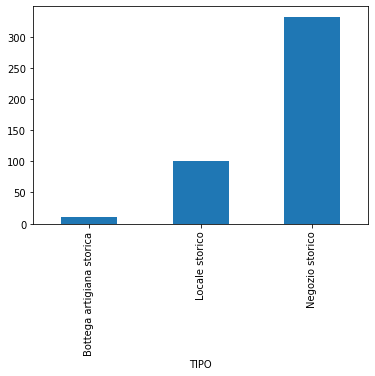

In [11]:
df.groupby(by="TIPO")['TIPO'].count().plot(x = "TIPO", y = "Totale", kind = "bar")

In [12]:
df.groupby(by="CAT_MERC")['CAT_MERC'].count()

CAT_MERC
Abbigliamento e accessori                53
Alimentari e specialità alimentari       48
Articoli sacri                            1
Attrezzature                             19
Auto e Moto                               7
Bar e tabaccheria                        30
Cartoleria e libreria                    34
Casa e arredamento                       28
Cura della persona                       10
Gelaterie, pasticcerie e torrefazioni    18
Merceria                                  3
Miscellanea                               6
Ottica e fotografia                      17
Preziosi                                 73
Ristorazione                             57
Salute e benessere                       12
Sartoria, calzoleria e riparazioni        2
Sport e tempo libero                     25
Name: CAT_MERC, dtype: int64

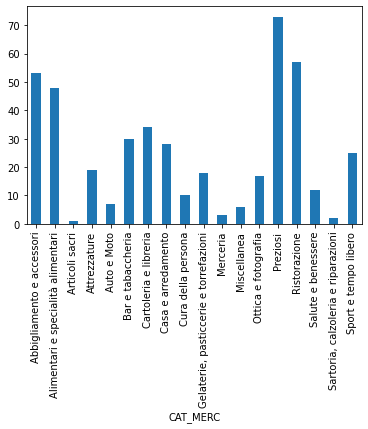

In [13]:
df.groupby(by="CAT_MERC")['CAT_MERC'].count().plot(x = "CAT_MERC", y = "Totale", kind = "bar")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


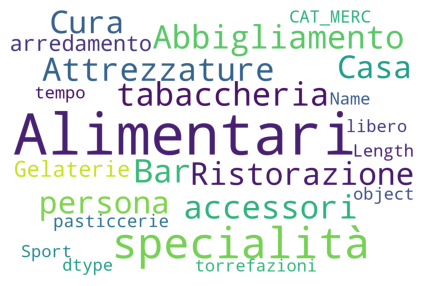

In [14]:
nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, max_words = 100, width = 1200, height = 800).generate(str(df['CAT_MERC']))

plt.rcParams['figure.figsize'] = (20, 5)
# plt.title('Most common tweets words', fontsize = 40, fontweight='bold', fontname="Times New Roman Bold", color= 'Red')
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
#df.groupby(by="ZIP")['ZIP'].count()

In [16]:
import plotly.express as px
import pandas as pd

df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="geo_y", 
                        lon="geo_x", 
                        hover_name="INSEGNA", 
                        hover_data=["INDIR_ORIG"],
                        #color="",
                        color_continuous_scale=color_scale,
                        #size="1",
                        zoom=12, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
import plotly.express as px
import pandas as pd

df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_preguerra, 
                        lat="geo_y", 
                        lon="geo_x", 
                        hover_name="INSEGNA", 
                        hover_data=["INDIR_ORIG"],
                        #color="",
                        color_continuous_scale=color_scale,
                        #size="1",
                        zoom=12, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [33]:
df_alimentari["dummy_mark_dimension"] = 1;

df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_alimentari, 
                        lat="geo_y", 
                        lon="geo_x", 
                        hover_name="INSEGNA", 
                        hover_data=["INDIR_ORIG", "CAT_MERC"],
                        #color="",
                        color_continuous_scale=color_scale,
                        size="dummy_mark_dimension",
                        size_max  = 8,
                        zoom=12, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [19]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_gelaterie, 
                        lat="geo_y", 
                        lon="geo_x", 
                        hover_name="INSEGNA", 
                        hover_data=["INDIR_ORIG"],
                        #color="",
                        color_continuous_scale=color_scale,
                        #size="1",
                        zoom=12, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()